In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("E:/Unified_Mentor_Data_Analyst_Internship_Projects/Googleplaystore Apps Rating Analysis Project/googleplaystore.csv")

In [3]:
print("Initial shape:", df.shape)

Initial shape: (10841, 13)


In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
#Data Cleaning and Preprocessing
# Correcting a known error in the dataset where one row is shifted
df = df[df['Android Ver'] != 'NaN']
df = df[df['Category'] != '1.9']

In [9]:
# Handle missing values by filling 'Rating' with the median 
df['Rating'].fillna(df['Rating'].median(), inplace=True)


C:\Users\Kavita choudhary\AppData\Local\Temp\ipykernel_12972\253241911.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].median(), inplace=True)


In [10]:
#dropping other NA rows
df.dropna(subset=['Type', 'Content Rating', 'Current Ver', 'Android Ver'], inplace=True)

In [11]:
# Convert 'Reviews' to a numeric type
df['Reviews'] = pd.to_numeric(df['Reviews'])

In [12]:
# Clean and convert 'Size' column to a numeric type (in bytes)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', 'e6') if 'M' in str(x) else str(x))
df['Size'] = df['Size'].apply(lambda x: str(x).replace('k', 'e3') if 'k' in str(x) else str(x))
df['Size'] = df['Size'].replace('Varies with device', np.nan)
df['Size'] = pd.to_numeric(df['Size'])
df['Size'].fillna(df['Size'].median(), inplace=True)

C:\Users\Kavita choudhary\AppData\Local\Temp\ipykernel_12972\2540067249.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Size'].fillna(df['Size'].median(), inplace=True)


In [13]:
# Clean and convert 'Installs' to a numeric type
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace('+', '').replace(',', ''))
df['Installs'] = pd.to_numeric(df['Installs'])

In [14]:
# Clean and convert 'Price' to a numeric type
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', ''))
df['Price'] = pd.to_numeric(df['Price'])

In [15]:
# Remove duplicate app entries, keeping the first occurrence
df.drop_duplicates(subset='App', inplace=True)

In [16]:
print("Data cleaning and preprocessing complete.")
print(df.info())

Data cleaning and preprocessing complete.
<class 'pandas.core.frame.DataFrame'>
Index: 9648 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   int64  
 4   Size            9648 non-null   float64
 5   Installs        9648 non-null   int64  
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   float64
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB
None


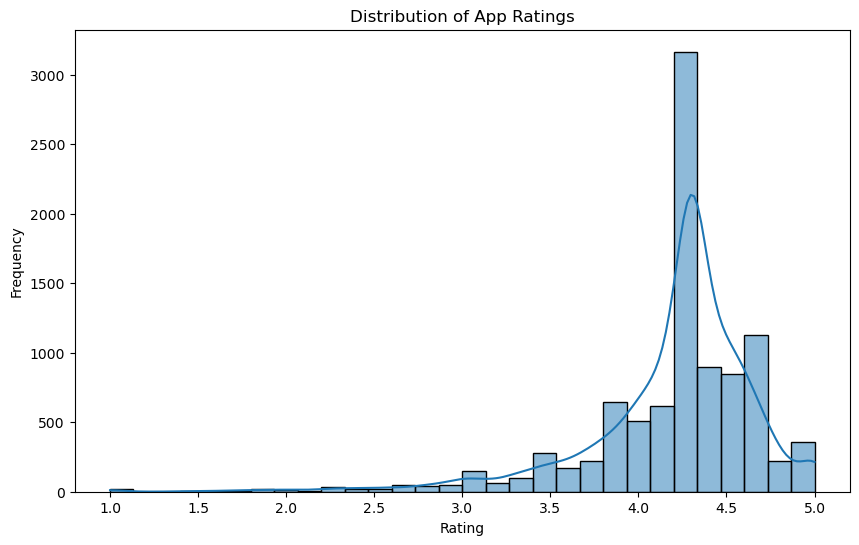

In [17]:
#Exploratory Data Analysis (EDA)
#Distribution of App Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=30, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

C:\Users\Kavita choudhary\AppData\Local\Temp\ipykernel_12972\4282751009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_categories.index, y=top_10_categories.values, palette='viridis')


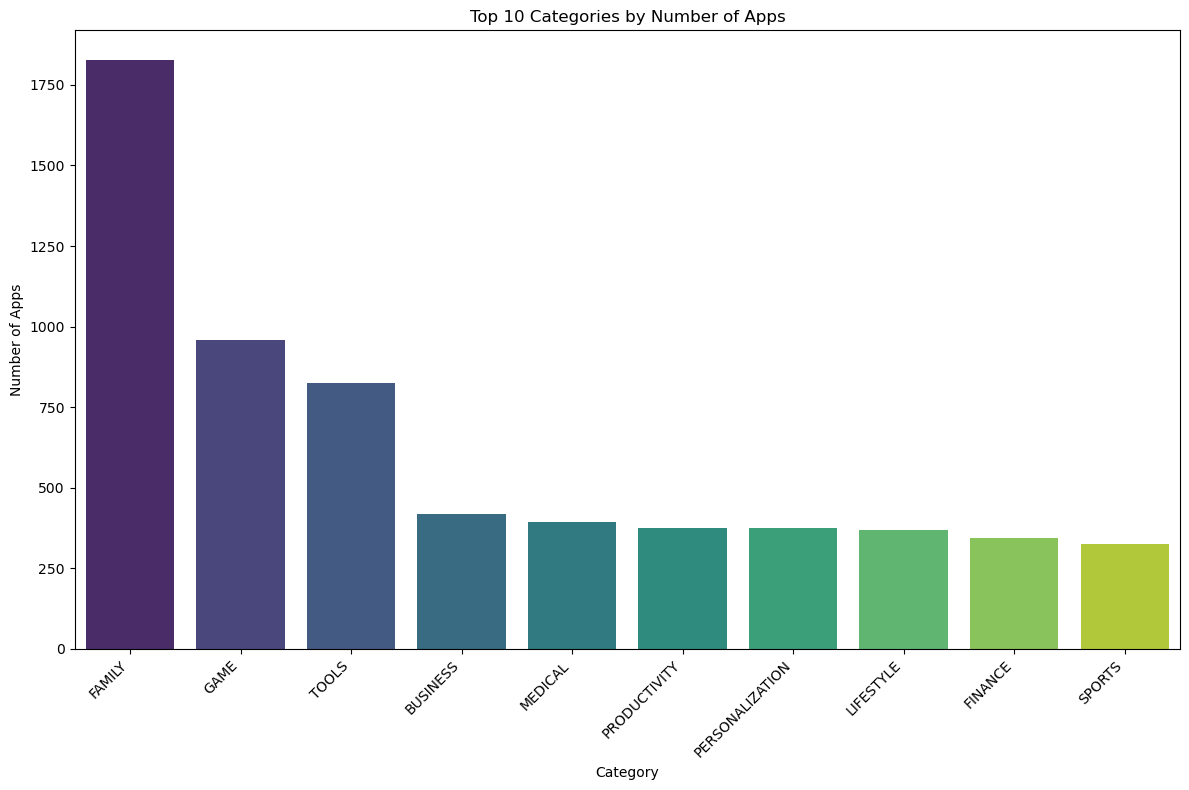

In [18]:
#Top 10 Categories by Number of Apps
plt.figure(figsize=(12, 8))
top_10_categories = df['Category'].value_counts().nlargest(10)
sns.barplot(x=top_10_categories.index, y=top_10_categories.values, palette='viridis')
plt.title('Top 10 Categories by Number of Apps')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

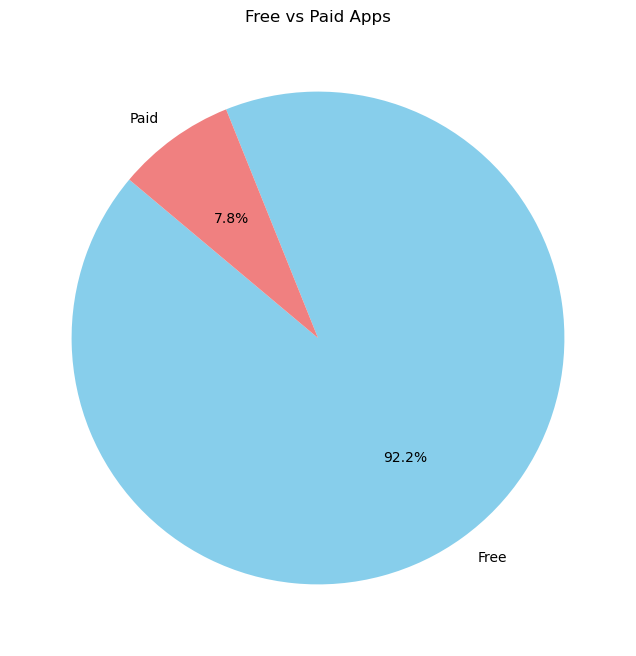

In [19]:
#Free vs. Paid Apps
plt.figure(figsize=(8, 8))
free_vs_paid = df['Type'].value_counts()
plt.pie(free_vs_paid, labels=free_vs_paid.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Free vs Paid Apps')
plt.ylabel('')
plt.show()

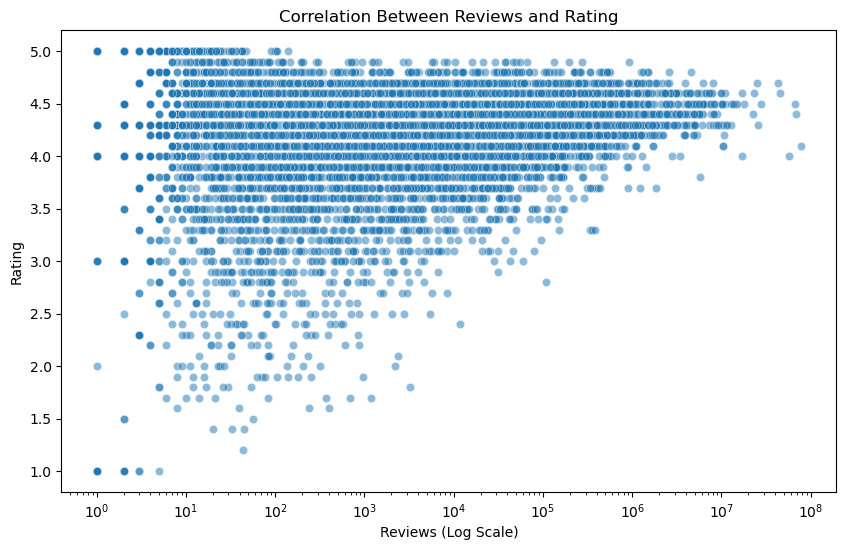

In [20]:
#Correlation Between Reviews and Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Reviews', y='Rating', alpha=0.5)
plt.title('Correlation Between Reviews and Rating')
plt.xlabel('Reviews (Log Scale)')
plt.ylabel('Rating')
plt.xscale('log')  
plt.show()

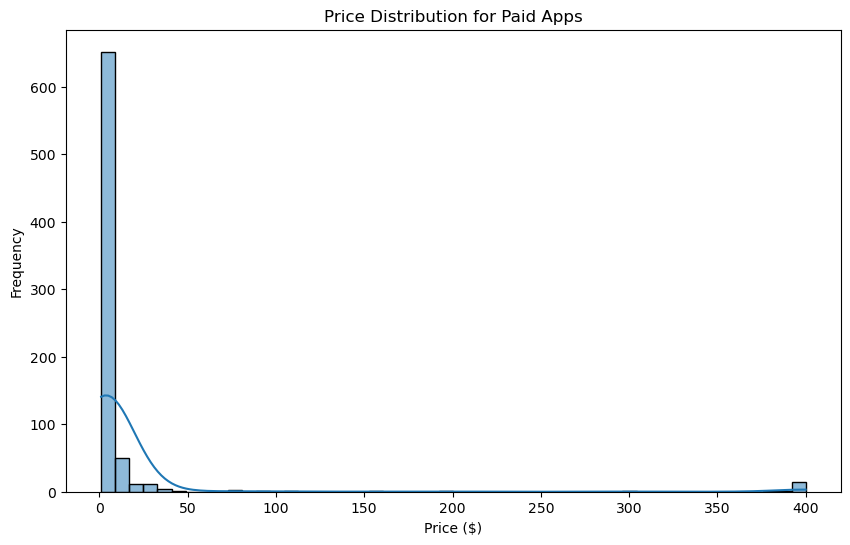

In [21]:
#Price Distribution for Paid Apps
paid_apps = df[df['Price'] > 0]
plt.figure(figsize=(10, 6))
sns.histplot(paid_apps['Price'], bins=50, kde=True)
plt.title('Price Distribution for Paid Apps')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

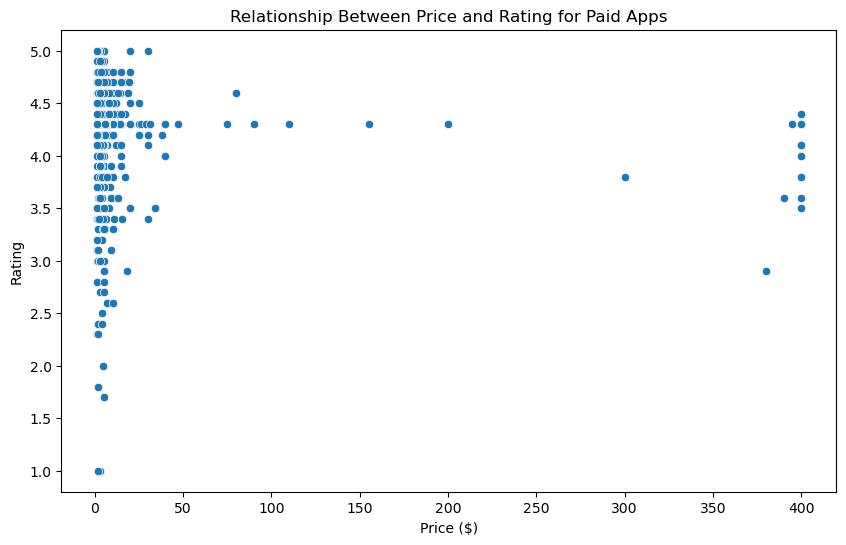

In [22]:
#Relationship Between Price and Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=paid_apps, x='Price', y='Rating')
plt.title('Relationship Between Price and Rating for Paid Apps')
plt.xlabel('Price ($)')
plt.ylabel('Rating')
plt.show()

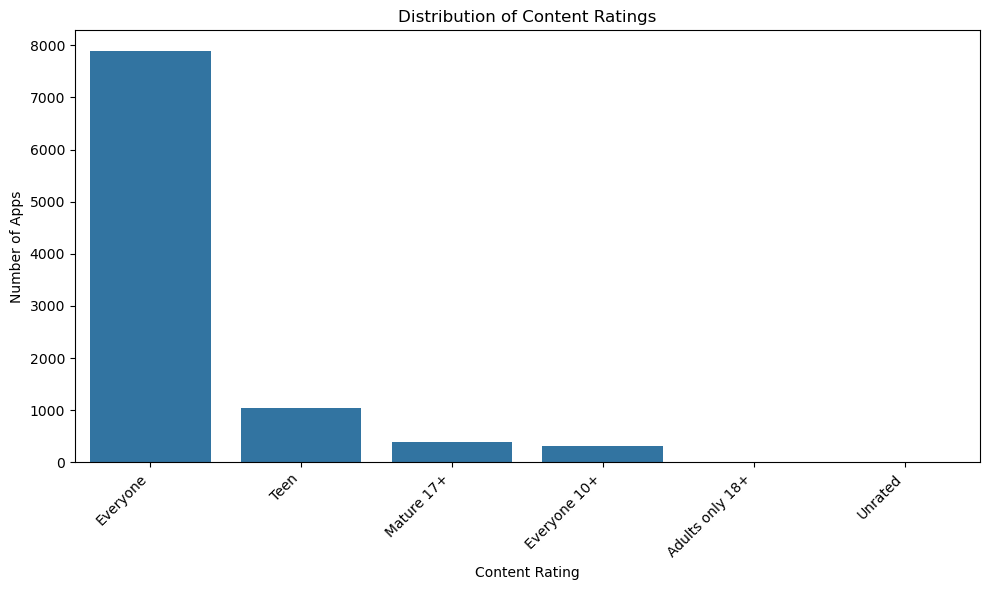

In [23]:
#Distribution of Content Ratings
plt.figure(figsize=(10, 6))
content_rating_dist = df['Content Rating'].value_counts()
sns.barplot(x=content_rating_dist.index, y=content_rating_dist.values)
plt.title('Distribution of Content Ratings')
plt.xlabel('Content Rating')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

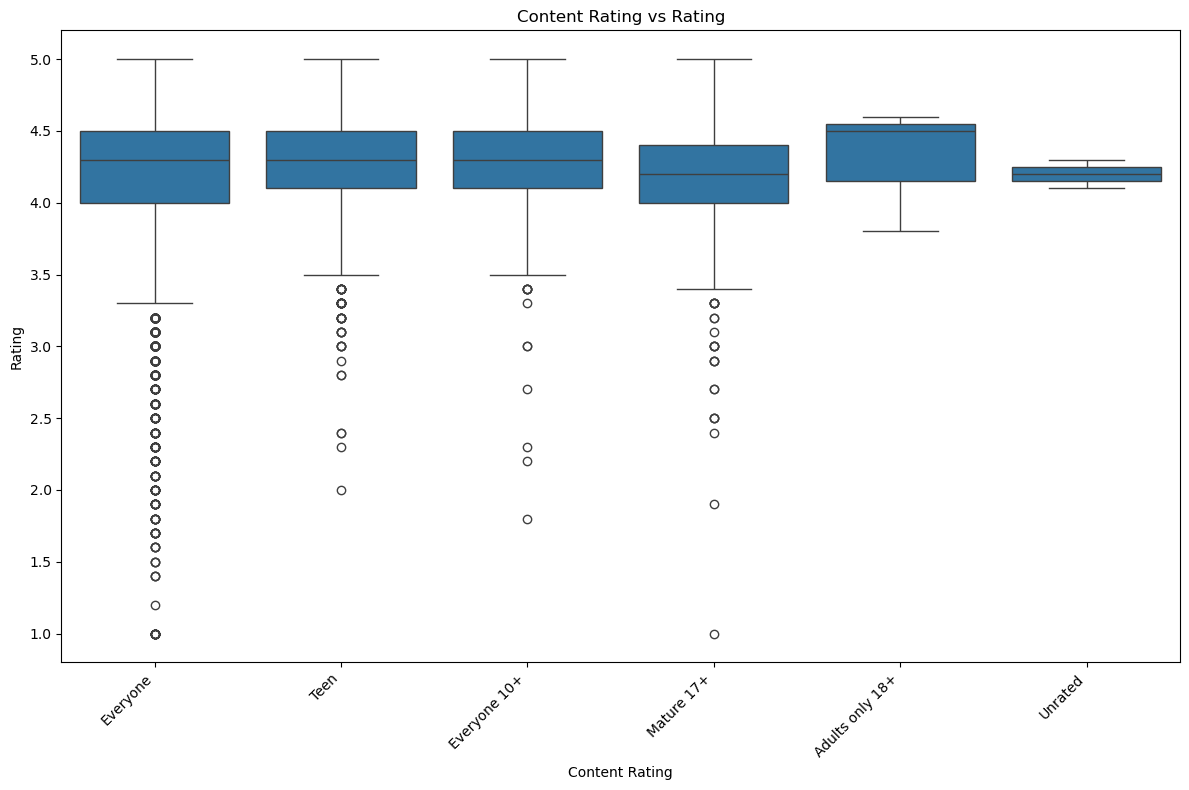

In [24]:
#Content Rating vs. Rating
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Content Rating', y='Rating')
plt.title('Content Rating vs Rating')
plt.xlabel('Content Rating')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\Kavita choudhary\AppData\Local\Temp\ipykernel_12972\139819443.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres_installs.index, y=top_genres_installs.values, palette='plasma')


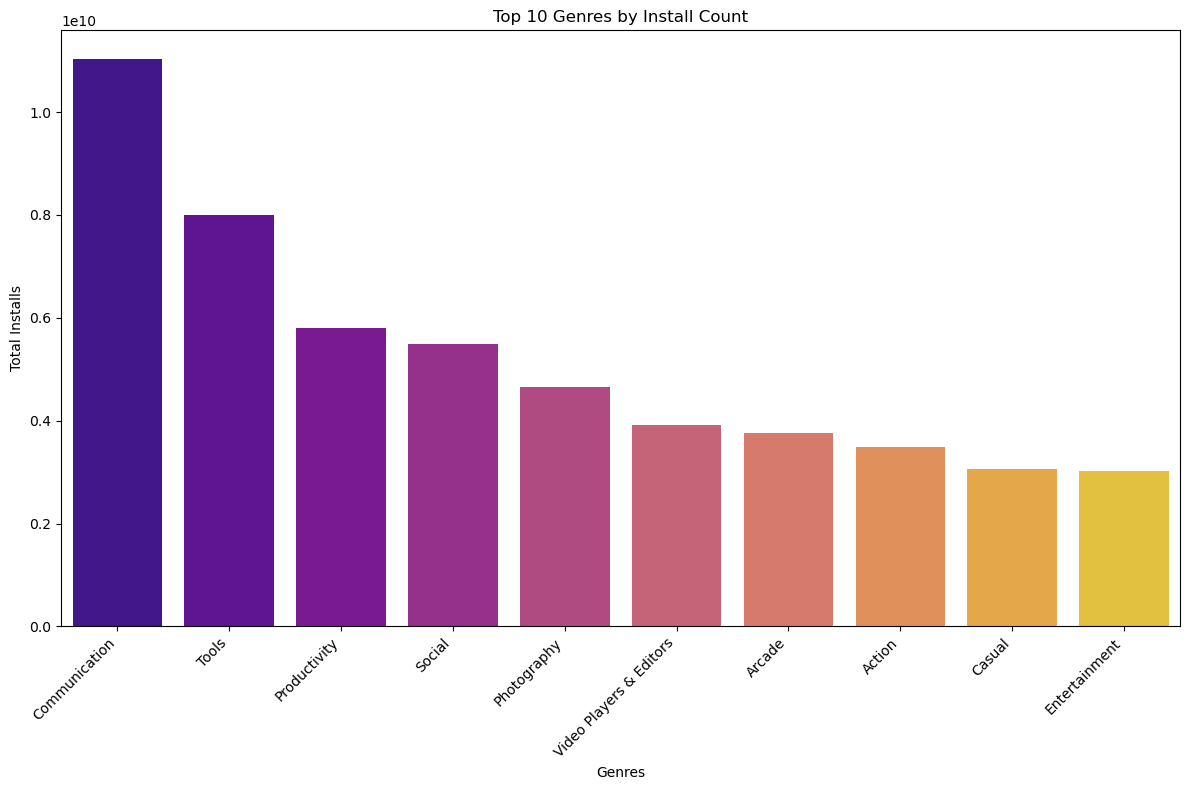

In [25]:
#Top Genres by Install Count
plt.figure(figsize=(12, 8))
top_genres_installs = df.groupby('Genres')['Installs'].sum().nlargest(10)
sns.barplot(x=top_genres_installs.index, y=top_genres_installs.values, palette='plasma')
plt.title('Top 10 Genres by Install Count')
plt.xlabel('Genres')
plt.ylabel('Total Installs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [26]:
# Prepare Data for Modeling
# Select features and target variable
df_ml = df[['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Rating']]

In [27]:
# Convert categorical variables into dummy/indicator variables (one-hot encoding)
df_ml = pd.get_dummies(df_ml, columns=['Category', 'Type', 'Content Rating'], drop_first=True)

In [28]:
# Define features (X) and target (y)
X = df_ml.drop('Rating', axis=1)
y = df_ml['Rating']

In [29]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Train the Machine Learning Model
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

In [31]:
# Fit the model on the training data
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [32]:
# Evaluate the Model
# Make predictions on the test data
y_pred = model.predict(X_test)

In [33]:
# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [34]:
# Print the evaluation results
print("--- Machine Learning Model Evaluation ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

--- Machine Learning Model Evaluation ---
Mean Absolute Error (MAE): 0.32
Mean Squared Error (MSE): 0.23
R-squared (R2): 0.05


In [35]:
import pandas as pd

# Assume 'model' and 'X' (from your training script) are already loaded and defined

# 1. Define the data for the new app
new_app_data = {
    'Category': 'BUSINESS',
    'Reviews': 5000,
    'Size': 25e6,      # 25MB
    'Installs': 100000,
    'Type': 'Paid',
    'Price': 9.99,
    'Content Rating': 'Everyone'
}
new_app_df = pd.DataFrame([new_app_data])

# 2. Apply one-hot encoding
new_app_encoded = pd.get_dummies(new_app_df, columns=['Category', 'Type', 'Content Rating'], drop_first=True)

# 3. Align columns with the original training data
# This ensures the new data has the exact same structure as the training data
new_app_processed = new_app_encoded.reindex(columns=X.columns, fill_value=0)

# 4. Predict the rating
predicted_rating = model.predict(new_app_processed)

# 5. Print the result
print("--- New App Prediction ---")
print(f"App Data: {new_app_data}")
print(f"Predicted Rating: {predicted_rating[0]:.2f} ⭐")

--- New App Prediction ---
App Data: {'Category': 'BUSINESS', 'Reviews': 5000, 'Size': 25000000.0, 'Installs': 100000, 'Type': 'Paid', 'Price': 9.99, 'Content Rating': 'Everyone'}
Predicted Rating: 4.27 ⭐


**SQL**

In [36]:
import duckdb

duckdb.register("df", df)

In [37]:
#Find the number of apps in each category
q1 = duckdb.sql("""
SELECT
    Category,
    COUNT(App) AS NumberOfApps
FROM
    df
GROUP BY
    Category
ORDER BY
    NumberOfApps DESC;
""").df()

print("\nFind the number of apps in each category\n", q1)


Find the number of apps in each category
                Category  NumberOfApps
0                FAMILY          1828
1                  GAME           959
2                 TOOLS           825
3              BUSINESS           420
4               MEDICAL           395
5          PRODUCTIVITY           374
6       PERSONALIZATION           374
7             LIFESTYLE           369
8               FINANCE           345
9                SPORTS           325
10        COMMUNICATION           315
11   HEALTH_AND_FITNESS           288
12          PHOTOGRAPHY           281
13   NEWS_AND_MAGAZINES           254
14               SOCIAL           239
15  BOOKS_AND_REFERENCE           221
16     TRAVEL_AND_LOCAL           219
17             SHOPPING           202
18               DATING           171
19        VIDEO_PLAYERS           163
20  MAPS_AND_NAVIGATION           131
21            EDUCATION           119
22       FOOD_AND_DRINK           112
23        ENTERTAINMENT           102
24    A

In [38]:
#Calculate the average rating for each content rating
q2 = duckdb.sql("""
SELECT
    "Content Rating",
    AVG(Rating) AS AverageRating
FROM
    df
GROUP BY
    "Content Rating"
ORDER BY
    AverageRating DESC;
"""
               ).df()
print("\nCalculate the average rating for each content rating\n", q2)


Calculate the average rating for each content rating
     Content Rating  AverageRating
0  Adults only 18+       4.300000
1             Teen       4.234556
2     Everyone 10+       4.229595
3          Unrated       4.200000
4         Everyone       4.188091
5       Mature 17+       4.138168


In [39]:
#Count the number of Free vs. Paid apps
q3 = duckdb.sql("""
SELECT
    Type,
    COUNT(*) AS TotalCount
FROM
    df
GROUP BY
    Type;
"""
               ).df()
print("\nCount the number of Free vs. Paid apps\n", q3)


Count the number of Free vs. Paid apps
    Type  TotalCount
0  Paid         753
1  Free        8895


In [40]:
#Find the top 10 most installed apps
q4 = duckdb.sql("""
SELECT
    App,
    Category,
    Installs
FROM
    df
ORDER BY
    Installs DESC
LIMIT 10;
"""
               ).df()
print("\nFind the top 10 most installed apps\n", q4)


Find the top 10 most installed apps
                                         App             Category    Installs
0                         Google Play Books  BOOKS_AND_REFERENCE  1000000000
1             Skype - free IM & video calls        COMMUNICATION  1000000000
2                                  Hangouts        COMMUNICATION  1000000000
3              Google Chrome: Fast & Secure        COMMUNICATION  1000000000
4                         Google Play Games        ENTERTAINMENT  1000000000
5                                     Gmail        COMMUNICATION  1000000000
6                            Subway Surfers                 GAME  1000000000
7                        WhatsApp Messenger        COMMUNICATION  1000000000
8  Messenger – Text and Video Chat for Free        COMMUNICATION  1000000000
9                                  Facebook               SOCIAL  1000000000


In [48]:
#Find the 5 most expensive apps with a good rating
q5 = duckdb.sql("""
SELECT 
    App, 
    Price, 
    Rating
From df
WHERE Rating >= 4.0
ORDER BY Price DESC
LIMIT 5;
""" 
).df()
print("\nFind the 5 most expensive apps with a good rating\n", q5)


Find the 5 most expensive apps with a good rating
                               App   Price  Rating
0                  I am Rich Plus  399.99     4.0
1          most expensive app (H)  399.99     4.3
2                   I Am Rich Pro  399.99     4.4
3               I Am Rich Premium  399.99     4.1
4  I am rich (Most expensive app)  399.99     4.1
